In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Upload file (manual option)
from google.colab import files
uploaded = files.upload()

# Load Excel file
df = pd.read_excel(next(iter(uploaded)))

# Preview
df.head()

Saving Rice Prodcution.xlsx to Rice Prodcution (1).xlsx


,Year,District,Sown(hect),Gross Harvested(hect),Yield(kg per hect),Nett harvetsted(hect),Total production(mt.),Season
0,2005,COLOMBO,2263.0,2257.0,2431.0,1918.0,4663.0,Yala
1,2005,GAMPAHA,3487.0,3408.0,2741.0,2897.0,7938.0,Yala
2,2005,KALUTARA,11479.0,11446.0,2335.0,10559.0,24656.0,Yala
3,2005,GALLE,9414.0,9336.0,2788.0,7306.0,20369.0,Yala
4,2005,MATARA,14115.0,14103.0,3219.0,11134.0,35843.0,Yala


In [ ]:
# Convert numeric columns
numeric_cols = ['Sown(hect)', 'Gross Harvested(hect)', 'Yield(kg per hect)',
                'Nett harvetsted(hect)', 'Total production(mt.)']
for col in numeric_cols:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df.reset_index(drop=True, inplace=True)

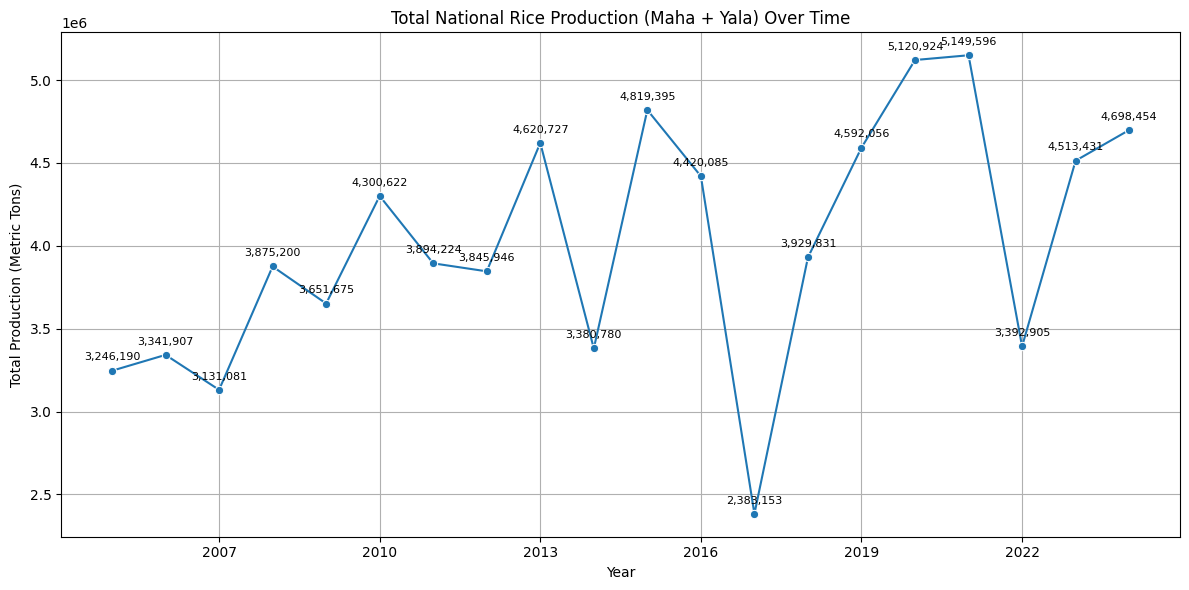

In [ ]:
import matplotlib.ticker as ticker

# Group by year
combined_national = df.groupby('Year')['Total production(mt.)'].sum().reset_index()

# Plot
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=combined_national, x='Year', y='Total production(mt.)', marker='o')
plt.title("Total National Rice Production (Maha + Yala) Over Time")
plt.ylabel("Total Production (Metric Tons)")
plt.xlabel("Year")

# Show integer years
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

# Annotate each point with its value
for i in range(len(combined_national)):
    year = combined_national['Year'].iloc[i]
    value = combined_national['Total production(mt.)'].iloc[i]
    ax.text(year, value + 50000, f'{int(value):,}', ha='center', va='bottom', fontsize=8, rotation=0)

plt.grid(True)
plt.tight_layout()
plt.show()

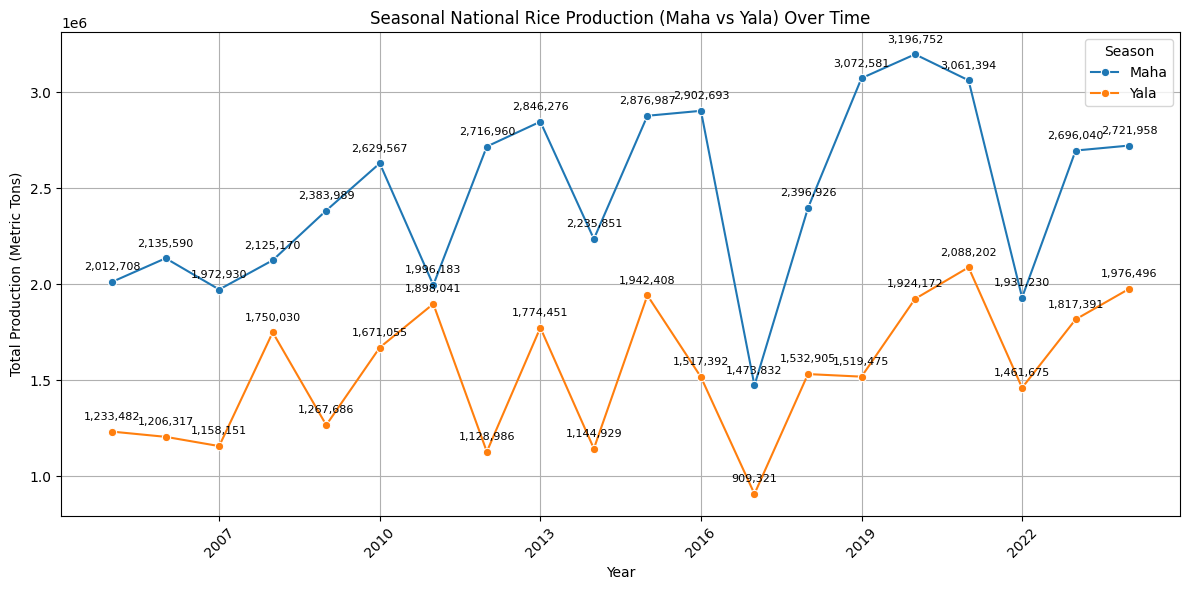

In [ ]:
# Group by year and season
seasonal_national = df.groupby(['Year', 'Season'])['Total production(mt.)'].sum().reset_index()

# Plot setup
plt.figure(figsize=(12, 6))
ax = sns.lineplot(data=seasonal_national, x='Year', y='Total production(mt.)', hue='Season', marker='o')
plt.title("Seasonal National Rice Production (Maha vs Yala) Over Time")
plt.ylabel("Total Production (Metric Tons)")
plt.xlabel("Year")
plt.xticks(rotation=45)
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.grid(True)

# Add value labels
for i in range(len(seasonal_national)):
    row = seasonal_national.iloc[i]
    year = row['Year']
    season = row['Season']
    value = row['Total production(mt.)']

    # Adjust label position slightly above
    ax.text(year, value + 50000, f'{int(value):,}', ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.show()

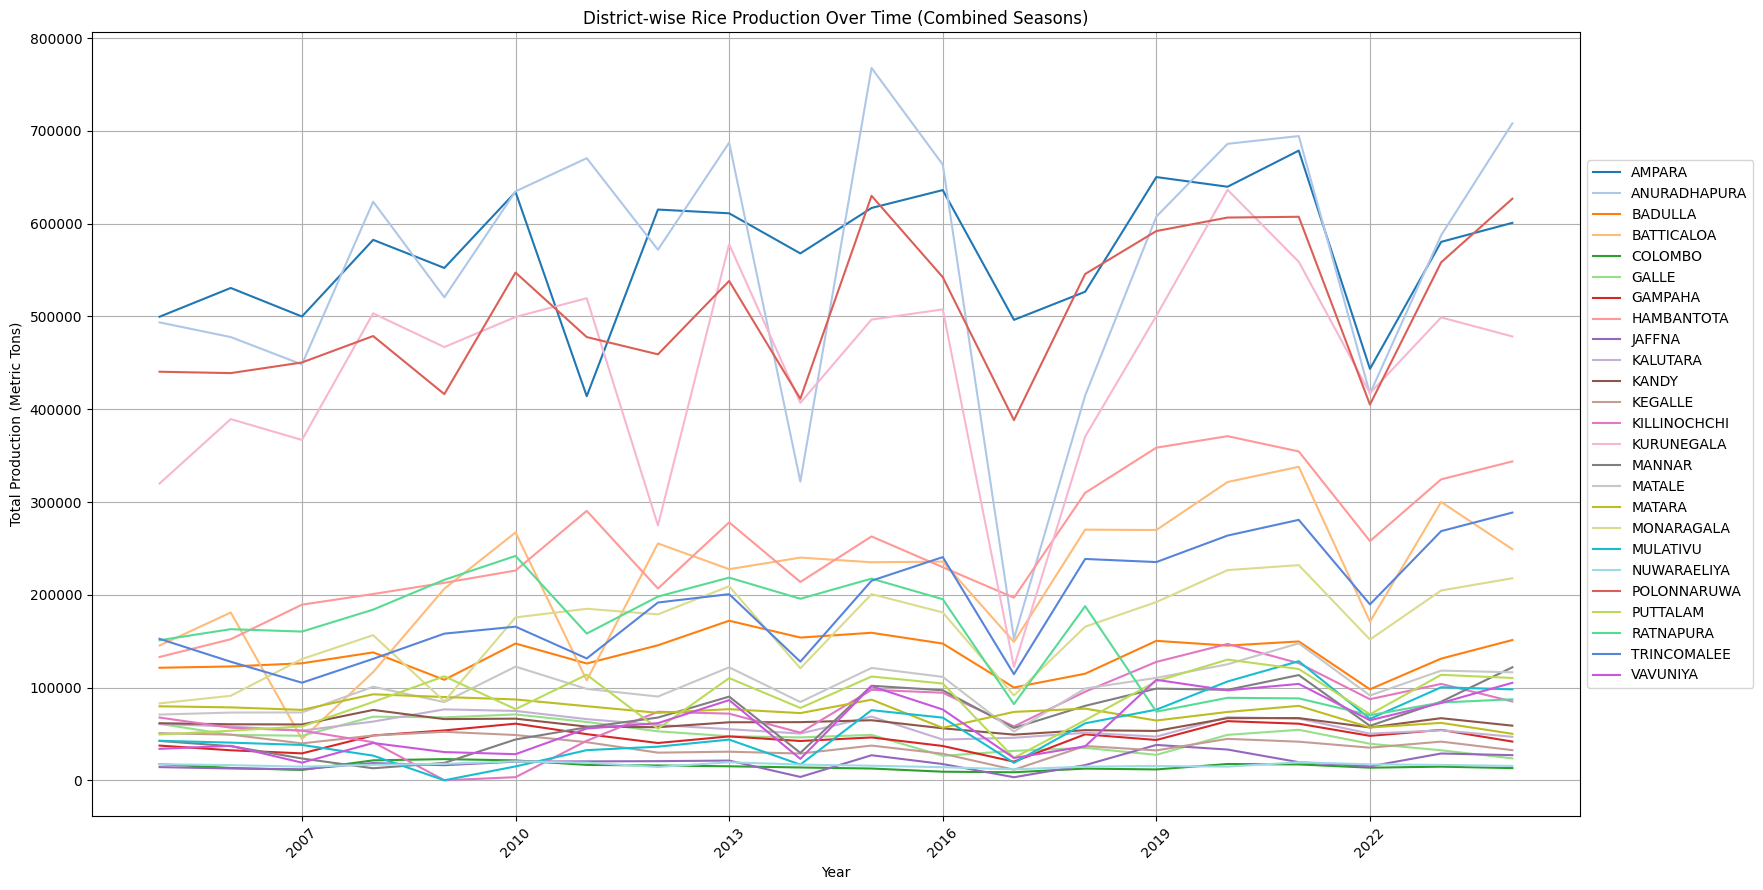

In [ ]:
# Ensure consistent district labels
df['District'] = df['District'].str.strip().str.replace('*', '', regex=False).str.upper()

# Group data
district_combined = df.groupby(['Year', 'District'])['Total production(mt.)'].sum().reset_index()

# Get list of unique districts
districts = district_combined['District'].unique()

# Set a custom color palette with enough distinct colors
palette = sns.color_palette("tab20", n_colors=20)  # Start with tab20
if len(districts) > 20:
    # If more than 20 districts, generate additional colors
    additional_colors = sns.color_palette("hls", n_colors=len(districts)-20)
    palette = palette + additional_colors

# Create a mapping from district to color
district_color_map = {district: palette[i] for i, district in enumerate(districts)}

# Plot
plt.figure(figsize=(16, 9))
sns.lineplot(
    data=district_combined,
    x='Year',
    y='Total production(mt.)',
    hue='District',
    palette=district_color_map
)
plt.title("District-wise Rice Production Over Time (Combined Seasons)")
plt.ylabel("Total Production (Metric Tons)")
plt.xlabel("Year")
plt.xticks(rotation=45)
plt.gca().xaxis.set_major_locator(ticker.MaxNLocator(integer=True))  # Show integer years
plt.grid(True)
plt.tight_layout()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)
plt.show()

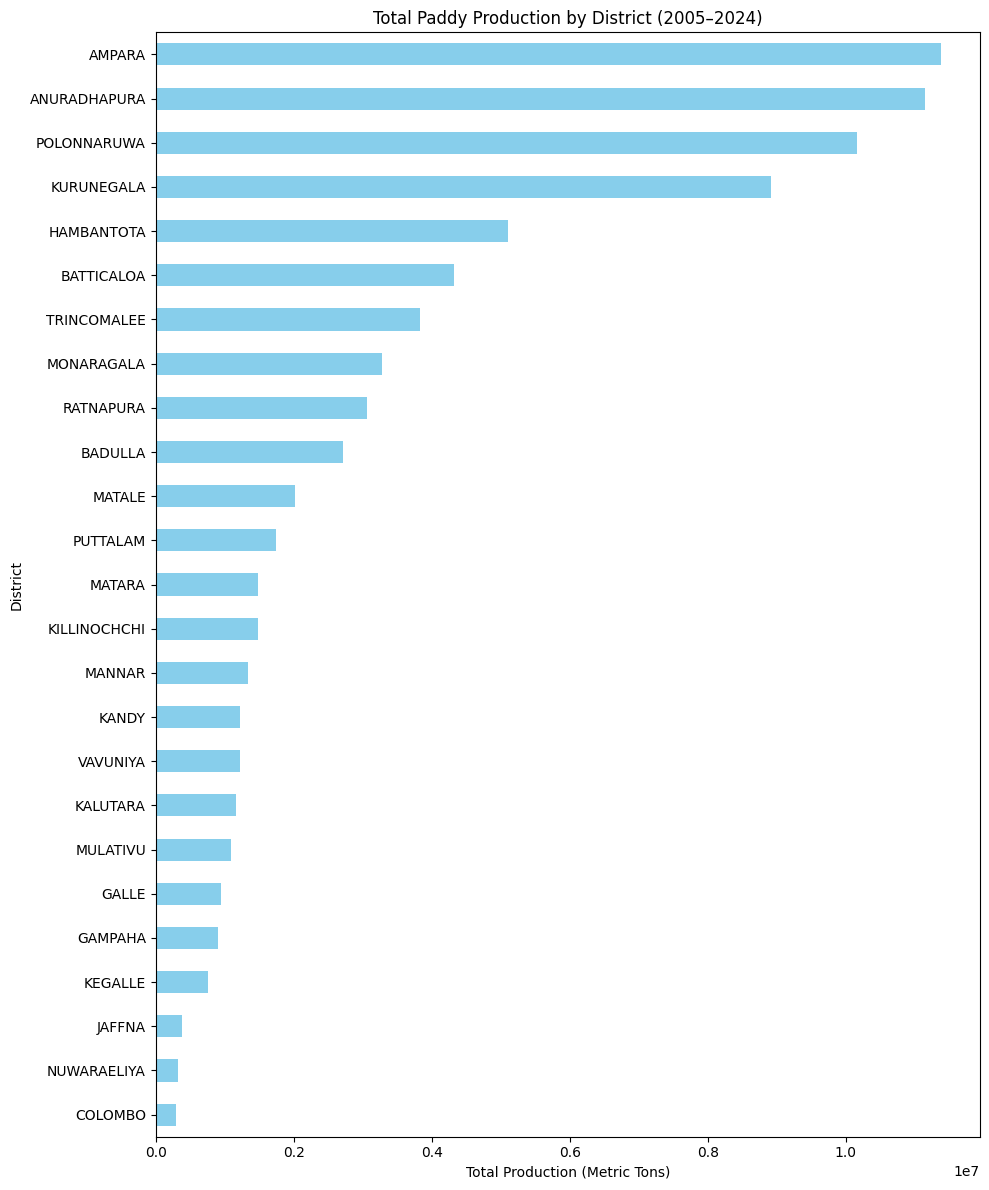

In [ ]:
# Total production for all districts
total_prod_all = df.groupby('District')['Total production(mt.)'].sum().sort_values(ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10, 12))  # Taller figure for more space
total_prod_all.plot(kind='barh', color='skyblue')
plt.title("Total Paddy Production by District (2005–2024)")
plt.xlabel("Total Production (Metric Tons)")
plt.ylabel("District")
plt.tight_layout()
plt.show()

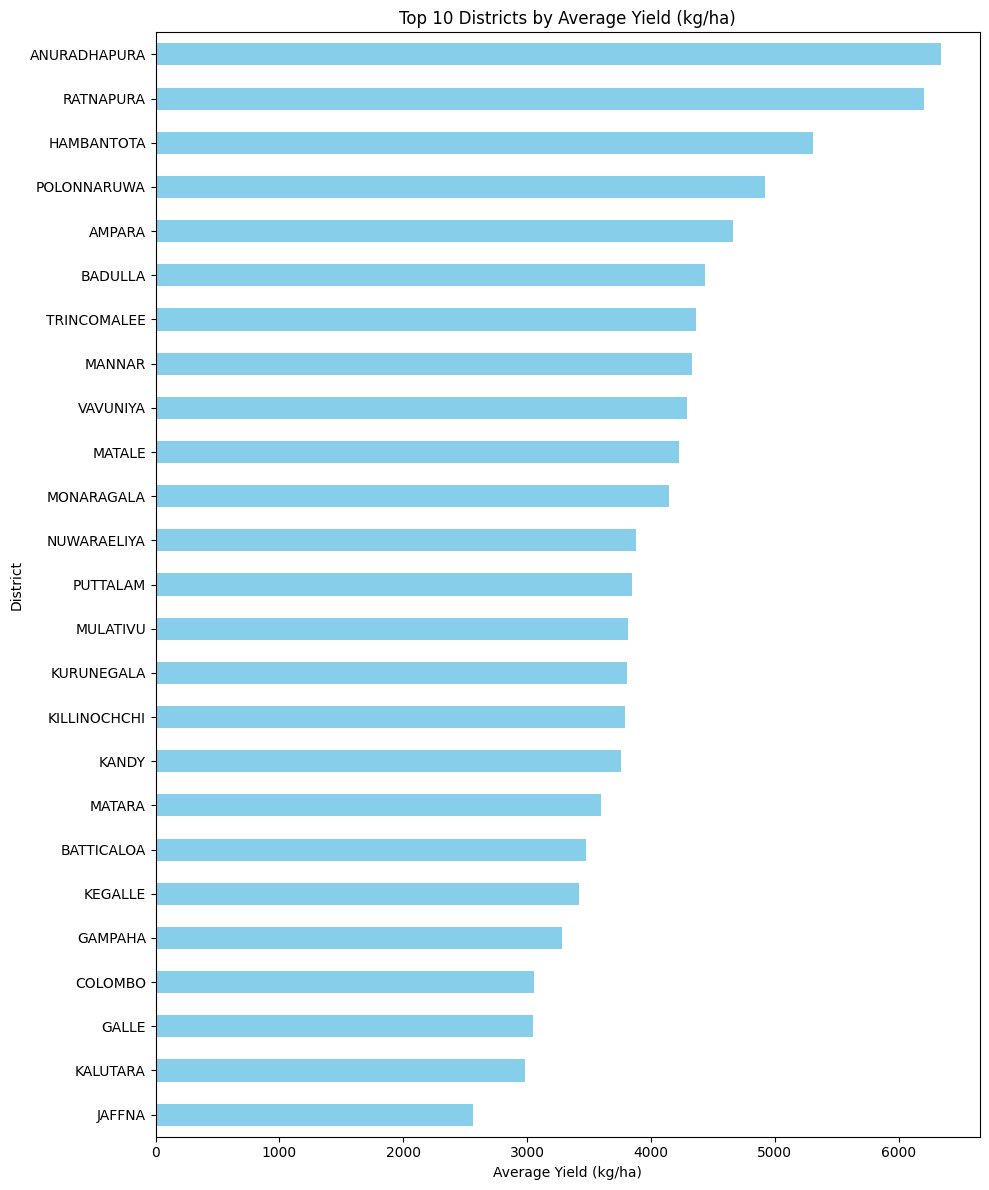

In [ ]:
# Total production for all districts
total_prod_all = df.groupby('District')['Yield(kg per hect)'].mean().sort_values(ascending=True)

# Plot horizontal bar chart
plt.figure(figsize=(10, 12))  # Taller figure for more space
total_prod_all.plot(kind='barh', color='skyblue')
plt.title("Top 10 Districts by Average Yield (kg/ha)")
plt.xlabel("Average Yield (kg/ha)")
plt.ylabel("District")
plt.tight_layout()
plt.show()

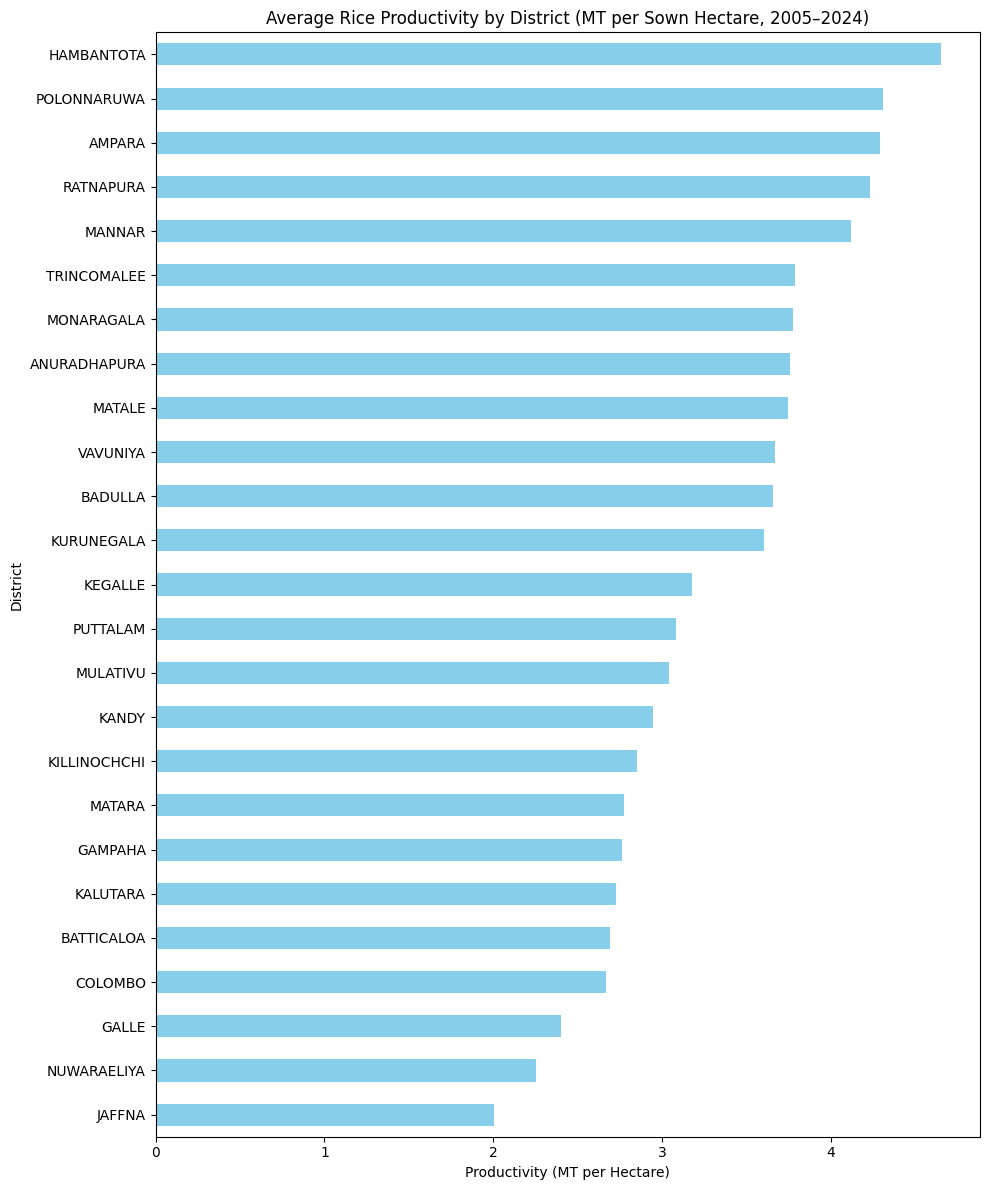

In [ ]:
# Clean district names to prevent duplicates
df['District'] = df['District'].str.strip().str.replace('*', '', regex=False).str.upper()

# Calculate total production and total sown area per district
district_prod = df.groupby('District')['Total production(mt.)'].sum()
district_sown = df.groupby('District')['Sown(hect)'].sum()

# Calculate productivity (MT per hectare)
district_productivity = (district_prod / district_sown).sort_values(ascending=True)

# Plot
plt.figure(figsize=(10, 12))
district_productivity.plot(kind='barh', color='skyblue')
plt.title("Average Rice Productivity by District (MT per Sown Hectare, 2005–2024)")
plt.xlabel("Productivity (MT per Hectare)")
plt.ylabel("District")
plt.tight_layout()
plt.show()

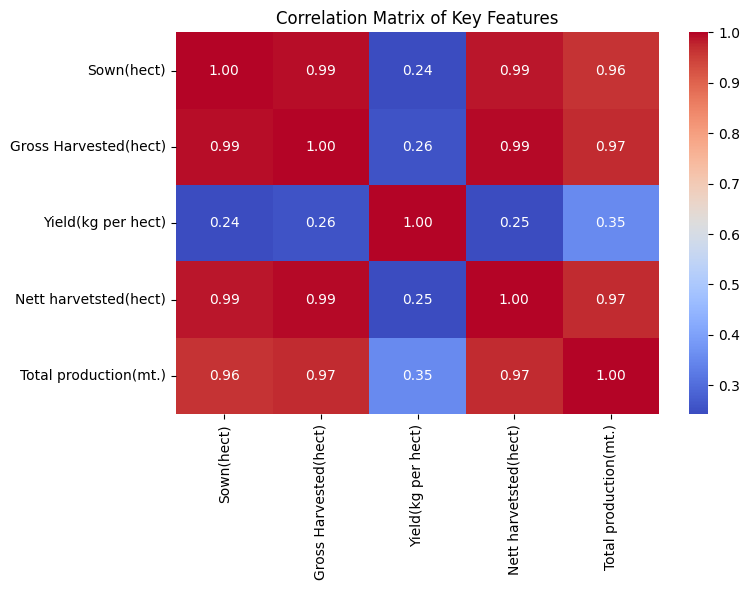

In [ ]:
plt.figure(figsize=(8,6))
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix of Key Features")
plt.tight_layout()
plt.show()